In [147]:
seed = 4

In [148]:
I = [[1, 0, 0, 0],
     [0, 1, 0, 0],
     [0, 0, 1, 0],
     [0, 0, 0, 1]]

# print I

In [149]:
# 返回矩阵的行数和列数

def shape(M):
    return len(M),len(M[0])

# print shape(I)

In [150]:
%run -i -e test.py LinearRegressionTestCase.test_shape

.
----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


In [151]:
# 输出矩阵中各元素(测试用)

M = [[1,2,3],
     [4,5,6],
     [7,8,9]]
#print M
#print M[1]
#print M[1][2]
#print len(M)
for i in range(len(M)):
    print M[i]

test = [i[-1] for i in M]
print test

[1, 2, 3]
[4, 5, 6]
[7, 8, 9]
[3, 6, 9]


In [152]:
# 矩阵中每个元素四舍五入到小数点后四位

def matxRound(M, decPts=4):
    for i in range(len(M)):
        for ls in range(len(M[i])):
            M[i][ls] = round(M[i][ls], decPts)
    #print M
    pass

matxRound(M, decPts=4)

In [153]:
%run -i -e test.py LinearRegressionTestCase.test_matxRound

.
----------------------------------------------------------------------
Ran 1 test in 0.171s

OK


In [154]:
# 计算矩阵的转置

def transpose(M):
    N = map(list, zip(*M))
    return N
#print transpose(M)

In [155]:
%run -i -e test.py LinearRegressionTestCase.test_transpose

.
----------------------------------------------------------------------
Ran 1 test in 0.113s

OK


In [156]:
# 测试用矩阵

A = [[1, 1, 1],
     [1, 1, 1]]

B = [[1, 1, 1, 1],
     [1, 1, 1, 1],
     [1, 1, 1, 1]]

b = [[1, 1],
     [1, 1]]

In [157]:
# 计算矩阵乘法 AxB

def matxMultiply(A, B):
    N = [[0.] * len(B[0]) for i in range(len(A))]
    #print N
    if len(A[0]) != len(B):
        raise ValueError
    else:
        for i in range(len(A)):
            for l in range(len(B[0])):
                for ls in range(len(B)):
                    N[i][l] += A[i][ls] * B[ls][l]
    return N
    
#matxMultiply(A, B)

In [158]:
%run -i -e test.py LinearRegressionTestCase.test_matxMultiply

.
----------------------------------------------------------------------
Ran 1 test in 0.130s

OK


In [159]:
# 构造增广矩阵

def augmentMatrix(A, b):
    Ab = [[0.] * len(A[0]) for i in range(len(A))]
    for i in range(len(A)):
        Ab[i] = A[i] + b[i]
    return Ab

print augmentMatrix(A, b)

[[1, 1, 1, 1, 1], [1, 1, 1, 1, 1]]


In [160]:
%run -i -e test.py LinearRegressionTestCase.test_augmentMatrix

.
----------------------------------------------------------------------
Ran 1 test in 0.010s

OK


In [161]:
W = [[1, 2],
     [3, 4]]
print W

[[1, 2], [3, 4]]


In [162]:
# 交换两行

def swapRows(M, r1, r2):
    a = M[r1]
    M[r1] = M[r2]
    M[r2] = a
    #return M
    pass
#swapRows(W, 0, 1)

In [163]:
%run -i -e test.py LinearRegressionTestCase.test_swapRows

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


In [164]:
# 某行乘以非零常数

def scaleRow(M, r, scale):
    if scale == 0:
        raise ValueError
    else:
        for ls in range(len(M[r])):
            M[r][ls] =  M[r][ls] * scale
    pass

In [165]:
%run -i -e test.py LinearRegressionTestCase.test_scaleRow

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


In [166]:
# 某行加上另一行的若干倍

def addScaledRow(M, r1, r2, scale):
    for ls in range(len(M[r1])):
        M[r1][ls] += M[r2][ls] * scale
    pass

In [167]:
%run -i -e test.py LinearRegressionTestCase.test_addScaledRow

.
----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


In [168]:
# 可逆矩阵推演
from helper import *
A = generateMatrix(3,seed,singular=False)
b = np.ones(shape=(3,1),dtype=int) # it doesn't matter
Ab = augmentMatrix(A.tolist(),b.tolist()) # 请确保你的增广矩阵已经写好了
printInMatrixFormat(Ab,padding=3,truncating=0)

  4, -5, -9 ||  1 
 -2, -2,  8 ||  1 
 -1, -3,  3 ||  1 


__--> 推演过程详见PDF__

In [169]:
# 奇异矩阵推演
A = generateMatrix(3,seed,singular=True)
b = np.ones(shape=(3,1),dtype=int)
Ab = augmentMatrix(A.tolist(),b.tolist()) # 请确保你的增广矩阵已经写好了
printInMatrixFormat(Ab,padding=3,truncating=0)

  0, -1, -6 ||  1 
  7,  1,  6 ||  1 
 -4, -1, -6 ||  1 


__--> 推演过程详见PDF__

In [170]:
# 实现 Gaussain Jordan 方法求解 Ax = b

def gj_Solve(A, b, decPts=4, epsilon = 1.0e-16):
    if len(A) != len(b):
        return None
    else:
        Ab = augmentMatrix(A, b)
        for ls in range(len(Ab[0]) - 1):
            i = ls
            index = ls
            mx = epsilon
            while i < len(A):
                if abs(Ab[i][ls]) > mx:
                    mx = abs(Ab[i][ls])
                    index = i
                i += 1
            if mx <= epsilon:
                return None
            else:
                swapRows(Ab, ls, index)
                scaleRow(Ab, ls, 1. / Ab[ls][ls])
                for num in range(len(A)):
                    if num != ls and Ab[num][ls] != 0:
                        addScaledRow(Ab, num, ls, -Ab[num][ls])
    
    x = [[n[-1]] for n in Ab]
    matxRound(x, decPts)
    return x

In [171]:
%run -i -e test.py LinearRegressionTestCase.test_gj_Solve

.
----------------------------------------------------------------------
Ran 1 test in 3.770s

OK


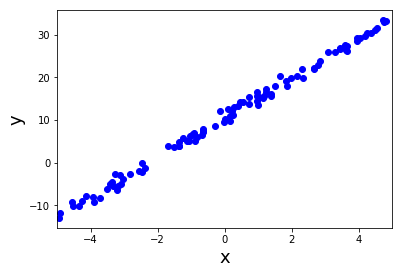

In [172]:
from helper import *
from matplotlib import pyplot as plt
%matplotlib inline

X,Y = generatePoints(seed,num=100)

## 可视化
plt.xlim((-5,5))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')
plt.show()

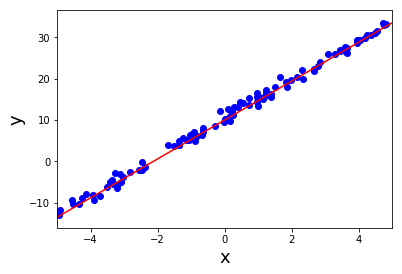

In [173]:
m1 = 4.7
b1 = 10


plt.xlim((-5,5))
x_vals = plt.axes().get_xlim()
y_vals = [m1*x+b1 for x in x_vals]
plt.plot(x_vals, y_vals, '-', color='r')

plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')

plt.show()

In [174]:
# 输出任意点坐标（测试用）

#print X[99]
#print len(X)
#X = [[x, 1] for x in X]
#print X

In [175]:
# 输出所选直线的MSE

def calculateMSE(X,Y,m,b):
    total = 0
    for i in range(len(X)):
        total += (Y[i] - m * X[i] - b) ** 2
    ave = total / len(X)
    return ave

print(calculateMSE(X,Y,m1,b1))

1.08222201087


In [178]:
# 实现线性回归

def linearRegression(X,Y):
    X = [[x, 1] for x in X]
    Y = [[y] for y in Y]
    XT = transpose(X)
    A = matxMultiply(XT, X)
    b = matxMultiply(XT, Y)
    h = gj_Solve(A, b)
    return h[0][0], h[1][0]

m2,b2 = linearRegression(X,Y)
assert isinstance(m2,float),"m is not a float"
assert isinstance(b2,float),"b is not a float"
print(m2,b2)

(4.6583, 10.5192)


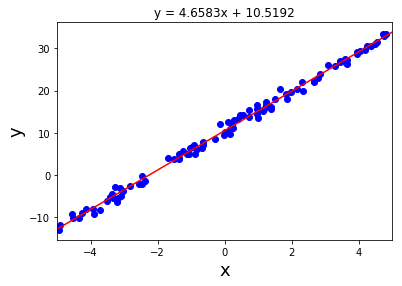

In [179]:
x1,x2 = -5,5
y1,y2 = x1*m2+b2, x2*m2+b2

plt.xlim((-5,5))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')
plt.plot((x1,x2),(y1,y2),'r')
plt.title('y = {m:.4f}x + {b:.4f}'.format(m=m2,b=b2))
plt.show()

In [180]:
print(calculateMSE(X,Y,m2,b2))

0.804781703623
